<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02-Machine-Learning/notebooks/02-ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Scikit Learn


![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Scikit_learn_logo.svg/621px-Scikit_learn_logo.svg.png)

En esta notebook se da una pequeña introducción al módulo Scikit Learn con la finalidad de familiarizarse con la mecánica de su funcionamiento.

En general, un problema de Machine Learning considera un conjunto de $n$ muestras de datos y, con ellos, se intenta predecir propiedades de datos desconocidos. Si cada muestra consiste de más de un único número, se dice que tiene varios atributos o características.

Consideraremos un ejemplo de clasificación para ilustrar el funcionamiento general de las herramientas y estimadores de Scikit-Learn. 

## El conjunto de datos

Consideraremos el dataset de dígitos, en este la tarea consiste en predecir, dada una imagen, qué dígito representa. Se nos dan muestras de cada una de las 10 clases posibles (los dígitos del cero al nueve) sobre las que ajustamos un estimador para poder predecir las clases a las que pertenecen las muestras no vistas.

In [45]:
from sklearn import datasets

digits = datasets.load_digits()

Este dataset contiene 1794 imágenes de $8\times 8$, cada imagen es un dígito escrito a mano.  

In [11]:
digits.data.shape

(1797, 64)

In [12]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

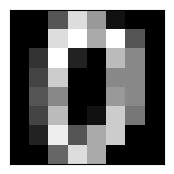

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(digits.data[0].reshape(8,8),cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

Las etiquetas se encuentran en el siguiente arreglo.

In [21]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

En scikit-learn, un estimador para la clasificación es un objeto Python que implementa los métodos fit(X, y) y predict(T). Estos métodos entrenan el modelo y realizan predicciones, respectivamente.

Un ejemplo de estimador es la clase [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), que implementa la clasificación usando una maquina de vectores de soporte (support vector machine).

Por ahora, veamos este estimador como una caja negra.

Primero, inicializamos el estimador usando su constructor, el cual toma como argumentos los hiper-parámetros del modelo (aún no sabemos qué significan estos parámetros).

**¿Cómo escogemos estos parámetros?**

Por ahora, manualmente. Existen herramientas, como [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) y [Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score).

In [47]:
from sklearn.svm import SVC

clf = SVC(gamma=0.001, C=100)

La instancia del estimador `clf` se ajusta primero al modelo; es decir, debe aprender de los datos de entrenamiento. Esto se hace pasando nuestro conjunto de entrenamiento al método de ajuste. Para el conjunto de entrenamiento, utilizaremos todas las imágenes de nuestro conjunto de datos, excepto las últimas imágenes, que reservaremos para realizar la tarea de predicción.

### Otro estimador

Podemos cambiar el clasificador, ahora por K vecinos más cercanos. Todo sigue funcionando igual.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

## División del conjunto de datos



Por lo anterior, dividimos el conjunto de datos en entrenamiento (*train*) y prueba (*test*) antes de realizar el entrenamiento y cualquier tipo de preprocesamiento.

In [48]:
X_train = digits.data[:-2]
y_train = digits.target[:-2]

## Un poco de preprocesamiento

Observa que el escalador, es también un estimador, en este caso no tenemos el método `predict`.

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0].reshape(8,8),cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

## Entrenamiento

Ahora, realizamos el entrenamiento. Para esto, usamos el método `fit`. Observemos que el método no regresa nada.

In [50]:
clf.fit(X=X_train,y=y_train)

SVC(C=100, gamma=0.001)

El modelo ya ha sido entrenado, dentro del estimador ya se pueden hacer varias cosas con el modelo. Por ejemplo, ver las métricas de desempeño.

In [51]:
clf.score(X_train,y_train)

0.9994428969359331

## Las predicciones

Ahora, realizamos las predicciones. Esto lo hacemos con el método `predict`. El método regresa las predicciones, como un arreglo.

In [56]:
clf.predict(digits.data[-2:])

array([1, 1])

In [29]:
clf.predict(digits.data[-2].reshape(1,-1))

array([9])

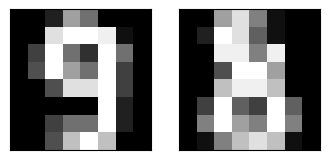

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plt.imshow(digits.data[-2].reshape(8,8),cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(digits.data[-1].reshape(8,8),cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

### Si transformamos los datos, también hay que transformar los datos de prueba.

In [52]:
test_escalados = scaler.transform(digits.data[-2:])

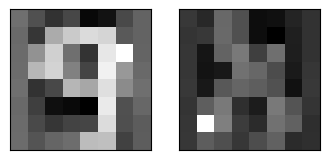

In [55]:
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plt.imshow(test_escalados[-2].reshape(8,8),cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(test_escalados[-1].reshape(8,8),cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [53]:
clf.predict(digits.data[-2:])

array([1, 1])